![alt text](http://localhost:8888/files/CMPINF%200010%20Final%20project/10.png?_xsrf=2%7C994b257c%7C0ad71eb25cd3f3913ec1fe1479208576%7C1731700920 "10")

# **Zip Codes for selected neighborhood:**

Zip Codes for selected neighborhood

Central Business District: 15219

Squirrel Hill South: 15217

North Oakland: 15213, 15260

Shadyside: 15232

Troy Hill: 15222

Point Breeze: 15208, 15221

Bloomfield: 15224

Central Lawrenceville: 15201

Greenfield: 15207

Larimer: 15206

# **Private Schools dataset:**


This dataset contains the locations of private schools within Allegheny County. Each entry includes the school's name and address. However, it does not include the neighborhood names. Therefore, we decided to use zip codes for our analysis.

                Neighborhood  School Count
0  Central Business District             6
1        Squirrel Hill South             9
2              North Oakland            14
3                  Shadyside             5
4                  Troy Hill             5
5               Point Breeze            23
6                 Bloomfield             4
7      Central Lawrenceville             3
8                 Greenfield             2
9                    Larimer            14


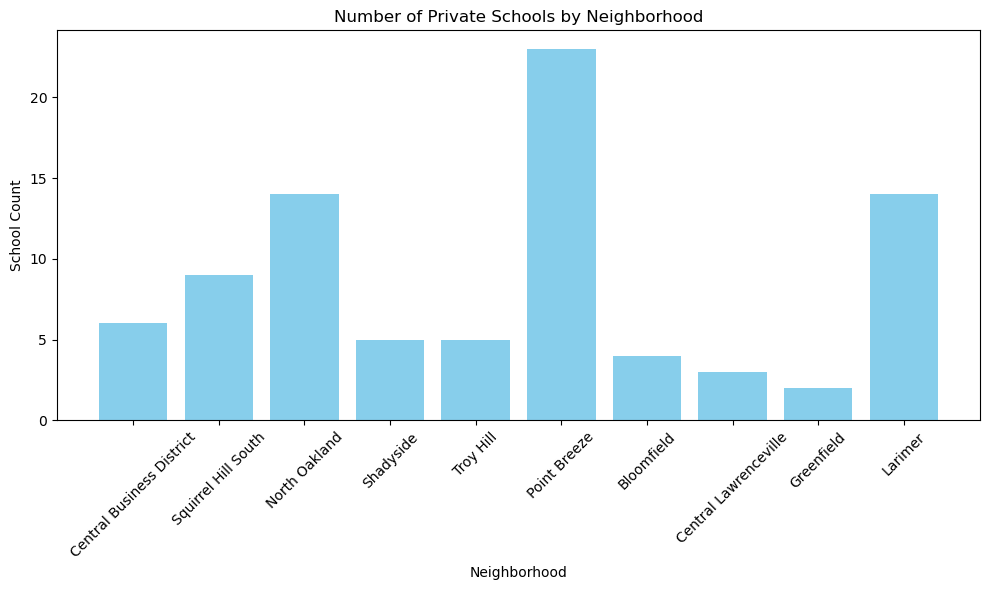

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the private schools dataset
file_path = 'Private_school.csv'
private_schools_data = pd.read_csv(file_path)

# neighborhoods and their zip codes
zip_codes_of_interest = {
    'Central Business District': [15219],
    'Squirrel Hill South': [15217],
    'North Oakland': [15213, 15260],
    'Shadyside': [15232],
    'Troy Hill': [15222],
    'Point Breeze': [15208, 15221],
    'Bloomfield': [15224],
    'Central Lawrenceville': [15201],
    'Greenfield': [15207],
    'Larimer': [15206]
}

# Count the number of private schools in each neighborhood
school_counts = {}
for neighborhood, zips in zip_codes_of_interest.items():
    neighborhood_schools = private_schools_data[private_schools_data['location_zip_code'].isin(zips)]
    school_counts[neighborhood] = neighborhood_schools.shape[0]

# Create a DataFrame for the school counts
school_counts_df = pd.DataFrame(list(school_counts.items()), columns=['Neighborhood', 'School Count'])

# Display the DataFrame
print(school_counts_df)

# Plot the number of private schools by neighborhood
plt.figure(figsize=(10, 6))
plt.bar(school_counts_df['Neighborhood'], school_counts_df['School Count'], color='skyblue')
plt.title("Number of Private Schools by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("School Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **The Best Neighborhood (compare):**

In [ ]:
import pandas as pd
data = {
    'neighborhood': [
        'Central Business District', 'Squirrel Hill South', 'North Oakland', 'Shadyside', 
        'Troy Hill', 'Point Breeze', 'Bloomfield', 'Central Lawrenceville', 
        'Greenfield', 'Larimer'
    ],
    'school_count': [6, 9, 14, 5, 5, 23, 4, 3, 2, 14],
    'arrest_count': [2901, 476, 288, 574, 240, 172, 558, 225, 315, 536],
    'total_violations': [207, 1653, 1183, 1815, 854, 788, 1660, 817, 1416, 2580]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate mean values for each column (school_count, arrest_count, total_violations)
mean_school_count = df['school_count'].mean()
mean_arrest_count = df['arrest_count'].mean()
mean_total_violations = df['total_violations'].mean()

# Checking if each neighborhood is above or below the mean for each metric
df['above_mean_schools'] = df['school_count'] >= mean_school_count
df['below_mean_arrests'] = df['arrest_count'] <= mean_arrest_count
df['below_mean_violations'] = df['total_violations'] <= mean_total_violations

# Sum the number of metrics each neighborhood meets (True values)
df['score'] = df[['above_mean_schools', 'below_mean_arrests', 'below_mean_violations']].sum(axis=1)

# Find all neighborhoods with the maximum score
max_score = df['score'].max()
best_neighborhoods = df[df['score'] == max_score]

# Display results
print("Full Data with Metrics:")
print(df)

print("\nBest Neighborhood(s) based on metrics:")
print(best_neighborhoods[['neighborhood', 'score']])
best_neighborhoods_sorted = best_neighborhoods.sort_values(by='arrest_count').iloc[0]
north_oakland_arrest_count = best_neighborhoods[best_neighborhoods['neighborhood'] == 'North Oakland']['arrest_count'].values[0]
point_breeze_arrest_count = best_neighborhoods[best_neighborhoods['neighborhood'] == 'Point Breeze']['arrest_count'].values[0]
arrest_count_difference = north_oakland_arrest_count - point_breeze_arrest_count

# Best neighborhood in comparison
print(f"The single best neighborhood based on lower arrest count and tie-breaking criterion:")
print(f"{best_neighborhoods_sorted['neighborhood']} has {arrest_count_difference} fewer arrests than North Oakland.")
print(best_neighborhoods_sorted[['neighborhood', 'arrest_count']])

# **Conclution (Strategy):**

We used the mean value as our benchmark. For each category—crime rate, food/restaurant violations, and number of private schools—we first calculated the average. Then, we compared each neighborhood’s arrest rate, violation count, and number of schools to this benchmark. After completing the comparisons, we found that North Oakland and Point Breeze scored higher than the mean value. Among these two neighborhoods, Point Breeze has the lowest arrest rate. Thus, we selected Point Breeze as the best neighborhood among the ten we evaluated.